In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
dataset = pd.read_csv("/content/mbti_1.csv")
x=dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1].values
print(dataset.head)

<bound method NDFrame.head of       type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]>


In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

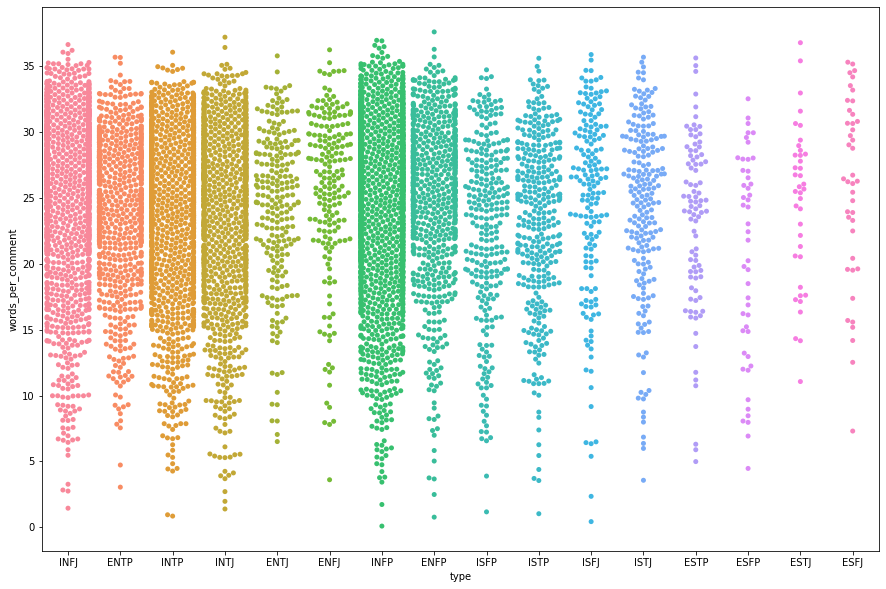

In [ ]:
df1 = dataset.copy()
#this function counts the no of words in each post of a user
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

#this function counts the no of words per post out of the total 50 posts in the whole row
df1['words_per_comment'] = df1['posts'].apply(lambda x: len(x.split())/50)
df1['variance_of_word_counts'] = df1['posts'].apply(lambda x: var_row(x))

plt.figure(figsize=(15,10))
sb.swarmplot("type", "words_per_comment", data=df1)


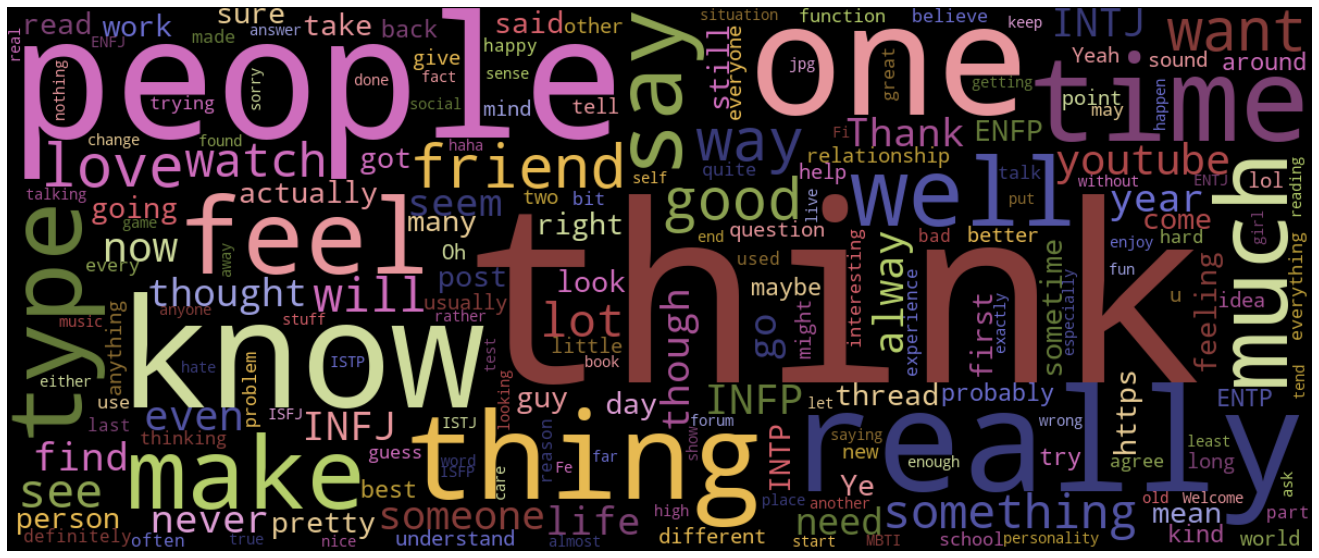

In [ ]:
#Plotting WordCloud.

#Finding the most common words in all posts.
words = list(df1["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="Black", 
                         colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

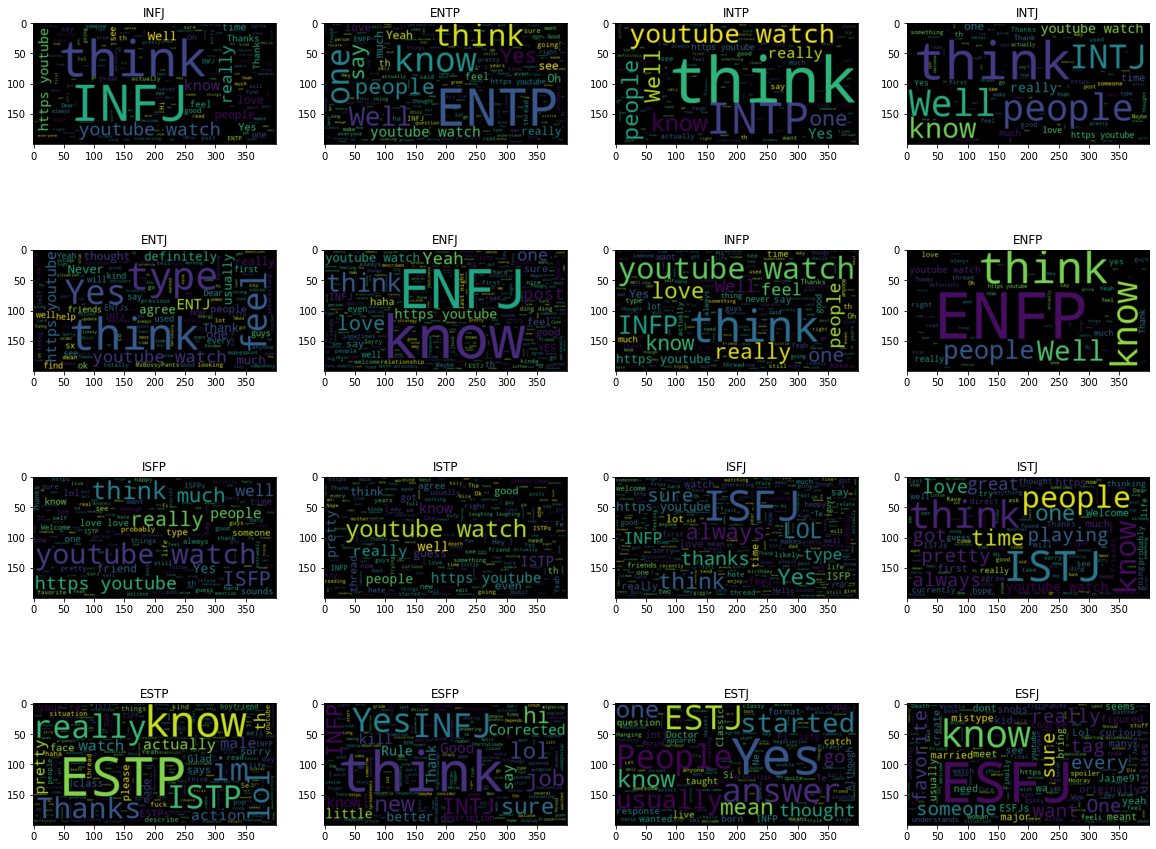

In [ ]:
fig, ax = plt.subplots(len(df1['type'].unique()), sharex=True, figsize=(20,len(df1['type'].unique())))
k = 0
for i in df1['type'].unique():
    df_4 = dataset[dataset['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [ ]:
dataset.posts[8]

"I'm not sure, that's a good question. The distinction between the two is so dependant on perception. To quote Robb Flynn, ''The hate you feel is nothing more, than love you feel to win this war.''|||Good question! It's tough to say for sure but I loved Winona Ryder as Lydia in Beetlejuice...  http://i63.photobucket.com/albums/h158/trinsghost/Misc-Images/2921aa070866f20450f8e1160b1e5d41.jpg|||https://www.youtube.com/watch?v=r5If816MhoU|||https://www.youtube.com/watch?v=Q-sQklvpDhA|||I've been lonely for much of my time. For a while now I've been working on changing ''how to think'', and one way is trying to find the positive in everything, no matter how bleak it might seem. I...|||I hope I can look back at this current stretch of time and think, ''Thank God I'm not there anymore and things are so much better''. What an ass-kickin' I'm taking.|||Help or a voice of reason, other than my own distorted, in my life. I'm completely frusterated and feel like I'm on the brink. I'm carrying the

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

In [ ]:
stop_words = stopwords.words('english')
ps = PorterStemmer()
corpus = []
for i in range(0, len(dataset)):
  review = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ',dataset['posts'][i])
  review = re.sub('[^a-zA-Z]', ' ', review)
  review = review.lower() 
  words = nltk.word_tokenize(review)
  words = [ps.stem(word) for word in words if word not in set(stop_words)]
  review = ' '.join(words)  
  corpus.append(review)

dataset.posts = corpus



In [ ]:
'''import re
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(dataset)):
  review = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ',dataset['posts'][i])
  review = re.sub('[^a-zA-Z]', ' ', review)
  review = review.lower()
 


 
  words = nltk.word_tokenize(review)
  words = [ps.stem(word) for word in words if word not in set(stop_words)]
  review = ' '.join(words)  
  corpus.append(review)'''

In [ ]:
'''dataset.posts = corpus'''

In [ ]:
dataset.posts[8]

'sure good question distinct two depend percept quot robb flynn hate feel noth love feel win war good question tough say sure love winona ryder lydia beetlejuic lone much time work chang think one way tri find posit everyth matter bleak might seem hope look back current stretch time think thank god anymor thing much better ass kickin take help voic reason distort life complet fruster feel like brink carri weight everyth neg ever life think post still feelin fleet thought acknowledg get lost depth love share one anoth could mundan thing everi simplest act make appreci told ocd awar obsess clean thing natur come understand affect thing obsess thought work song tri learn year hope finish new year still way go son anarchi first tv seri follow sinc x file way back day fleet big book person everi go stage forc read normal one book alway stand term interest read venu frustrat got best today lot late coupl heineken right feel bit better difficult time go bit got ta maintain find balanc get har

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer( ngram_range=(1, 1), max_features=5000)
Y = cv.fit_transform(corpus).toarray()

In [ ]:
Y.shape

(8675, 5000)

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
dataset['new type'] = enc.fit_transform(dataset['type'])

X = dataset['new type']

In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Y, X, test_size=0.2,  random_state=42)
print ((X_train.shape),(Y_train.shape),(X_test.shape),(Y_test.shape))

(6940, 5000) (6940,) (1735, 5000) (1735,)


In [ ]:
ros = RandomOverSampler(random_state=42)
X_train_ros, Y_train_ros = ros.fit_resample(X_train, Y_train)

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
accuracies = {}
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB1 = GaussianNB()
NB1.fit(X_train, Y_train)

GaussianNB()

Accuracy: 22.94%
Accuracy: 23.59%
[[  1   9   0   3   0   0   0   0  10   9   1   0   1   4   2   1]
 [  3  33   2  10   0   0   0   0  13  23  11   6   1   5   3  15]
 [  1   4   5   7   0   0   0   0   1   4  15   3   0   1   1   2]
 [  1   7   6  31   0   0   0   0  12  15  19  20   0   1   1  22]
 [  0   2   1   0   0   0   0   0   3   0   0   0   0   0   0   1]
 [  0   1   1   3   0   0   0   0   0   1   0   0   0   2   0   0]
 [  0   2   1   1   0   0   0   0   0   3   0   0   0   0   0   0]
 [  2   1   0   2   0   0   0   1   2   1   0   2   0   2   0   2]
 [  5  34   5  22   0   0   0   0  85  50  26  17   1  13   3  27]
 [  4  65  11  23   0   0   0   0  66 107  22  21   0   8   2  41]
 [  0  12   5  27   0   0   0   0  18  14  44  42   0   5   2  24]
 [  1  18  18  48   0   0   0   0  17  32  40  78   0   7   4  30]
 [  1  11   3   2   0   0   0   0   8   4   1   4   0   4   0   7]
 [  2   6   1   5   0   0   0   0  10   9   3   1   0   4   1  11]
 [  0   5   5   5   0   0   

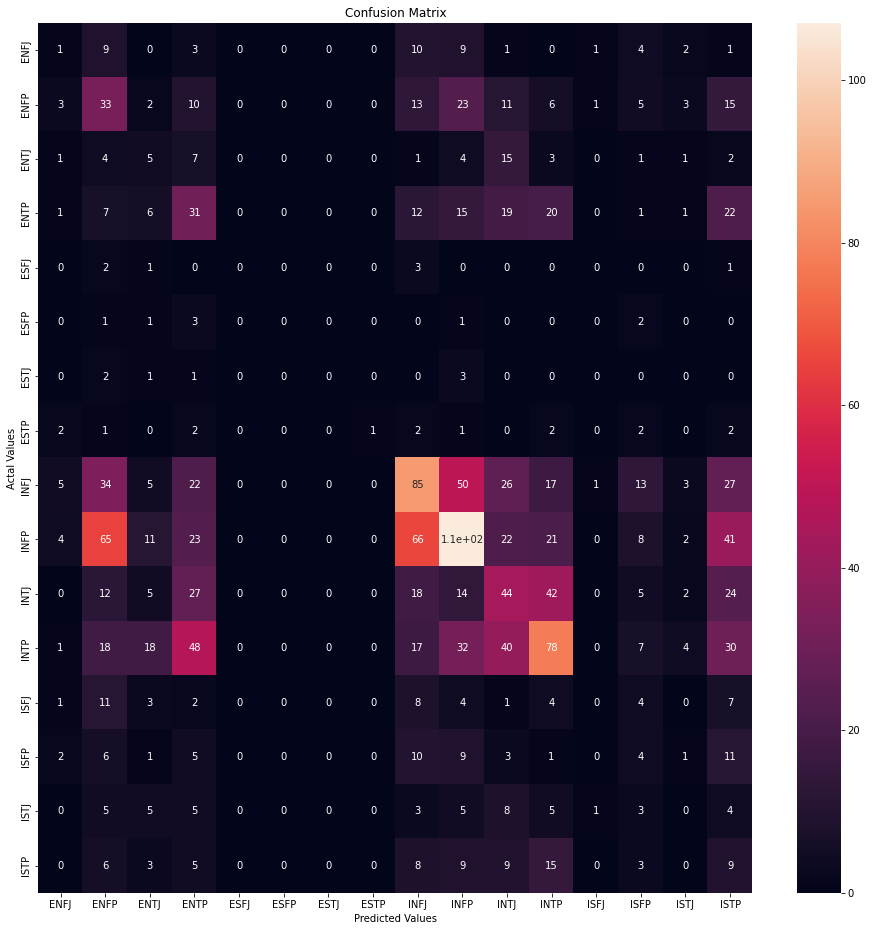

'f1: 24.29%'

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracies = {}
Y_pred = NB1.predict(X_test)
predictions = [round(value) for value in Y_pred]



# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)
cm_df = pd.DataFrame(cm,
                     index = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], 
                     columns = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'])

plt.figure(figsize=(16,16))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()



'''Accuracy: 23.23%'''
'''f1: 24.29%'''

Accuracy: 23.98%
Accuracy: 24.29%
[[  1   8   0   2   0   0   0   0  13   9   0   0   1   4   2   1]
 [  3  25   2  10   0   0   0   0  19  29  11   6   1   4   3  12]
 [  1   4   5   8   0   0   0   0   2   4  12   4   0   1   1   2]
 [  1   5   6  33   0   0   0   0  11  18  20  21   0   1   1  18]
 [  0   1   1   0   0   0   0   0   4   0   0   0   0   0   0   1]
 [  0   1   1   2   0   0   0   0   0   1   1   0   0   2   0   0]
 [  0   1   1   0   0   0   0   0   0   4   1   0   0   0   0   0]
 [  2   0   0   2   0   0   0   1   2   1   1   2   0   2   0   2]
 [  6  26   5  19   0   0   0   0  84  58  28  21   0  12   3  26]
 [  4  56  12  25   0   0   0   0  61 120  20  24   0   8   2  38]
 [  0  11   5  23   0   0   0   0  19  17  46  45   0   5   2  20]
 [  0  12  18  36   0   0   0   0  22  39  37  88   0   7   4  30]
 [  1  10   3   2   0   0   0   0  10   5   1   3   0   4   0   6]
 [  2   6   1   5   0   0   0   0   7  11   4   2   0   4   1  10]
 [  0   5   4   5   0   0   

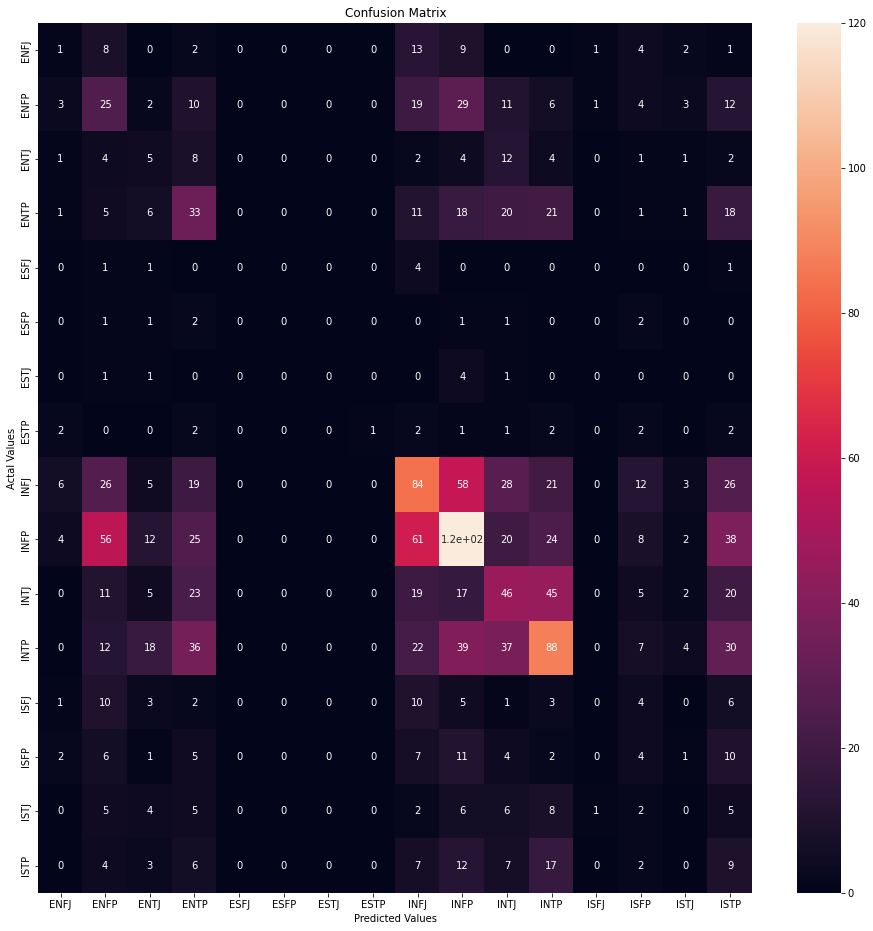

'f1: 24.29%'

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB1 = GaussianNB()
NB1.fit(X_train_ros, Y_train_ros)

from sklearn.metrics import accuracy_score
accuracies = {}
Y_pred = NB1.predict(X_test)
predictions = [round(value) for value in Y_pred]
f1_score(Y_test, predictions, average='weighted')
confusion_matrix(Y_test, predictions)


# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)

cm_df = pd.DataFrame(cm,
                     index = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], 
                     columns = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'])

plt.figure(figsize=(16,16))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
'''Accuracy: 23.98%'''
'''f1: 24.29%'''

Accuracy: 34.87%
Accuracy: 26.79%
[[  0   0   0   0   0   0   0   0  17  24   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0  26  92   3   3   0   0   0   0]
 [  0   0   0   1   0   0   0   0   7  24   6   6   0   0   0   0]
 [  0   0   0   0   0   0   0   0  37  59   2  37   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   8   7   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 119 158   4   7   0   0   0   0]
 [  0   0   0   0   0   0   0   0  32 329   1   8   0   0   0   0]
 [  0   0   0   0   0   0   0   0  39  87  36  31   0   0   0   0]
 [  0   0   0   1   0   0   0   0  26 144   2 120   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12  32   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2  51   0   0   0   0   0   0]
 [  0   0   0   0   0   0   

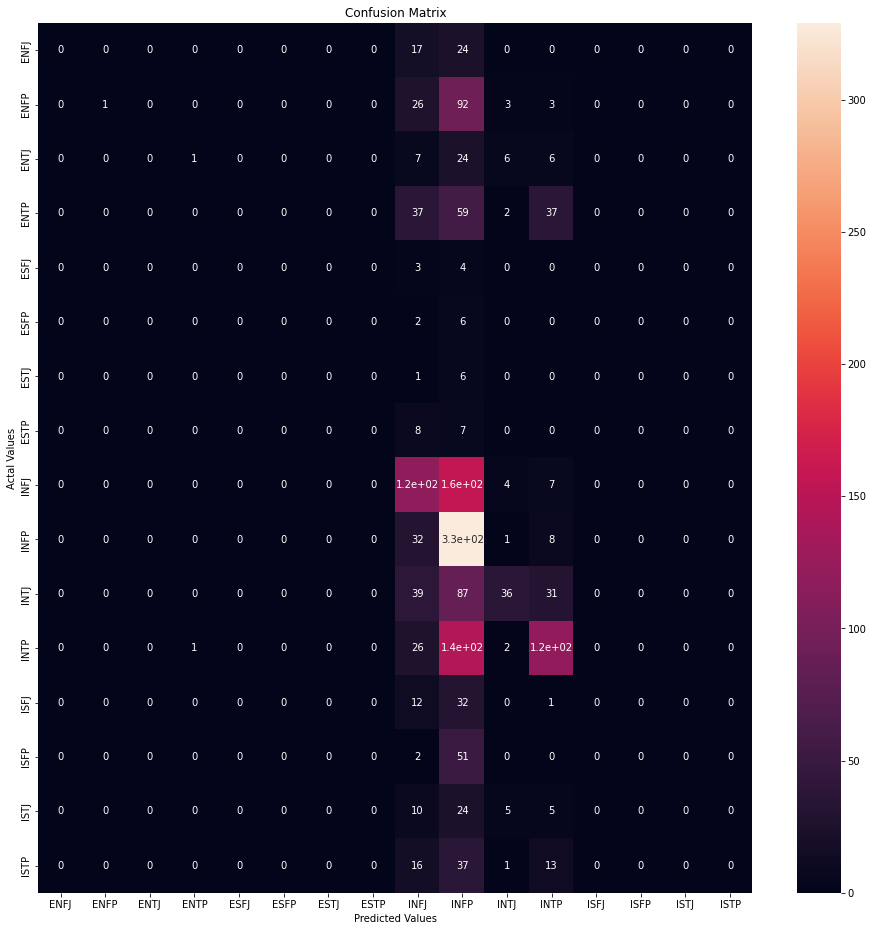

'Accuracy: 34.87%\nf1: 26.79%'

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, Y_train)

Y_pred = NB.predict(X_test)
predictions = [round(value) for value in Y_pred]



# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)

cm_df = pd.DataFrame(cm,
                     index = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], 
                     columns = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'])

plt.figure(figsize=(16,16))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

'''Accuracy: 34.87%
f1: 26.79%'''

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train_smote, Y_train_smote)


MultinomialNB()

Accuracy: 49.97%
Accuracy: 50.86%
[[ 13   9   0   1   0   0   0   1   7   4   2   0   0   3   1   0]
 [  3  80   3   6   1   1   0   1  12   8   5   3   1   1   0   0]
 [  3   1  18   6   0   0   0   0   3   3   7   0   0   2   0   1]
 [  1  13   9  59   2   0   0   1  10   7  12  10   1   5   1   4]
 [  1   2   0   0   0   0   0   1   1   0   1   0   0   0   1   0]
 [  0   3   1   0   0   0   0   1   0   1   0   0   0   2   0   0]
 [  0   1   2   0   0   0   0   0   1   1   0   0   1   1   0   0]
 [  0   2   2   1   0   0   0   5   0   0   2   0   0   0   0   3]
 [  9  26   8  12   2   0   0   3 135  48  18   5   4  11   3   4]
 [ 17  39   7   5   4   1   0   1  35 205  14  13   1  19   4   5]
 [  3  10   7   8   2   2   0   3  15   8  98  23   1   5   3   5]
 [  1   8  11  16   1   1   1   2  15  24  31 155   1   9   2  15]
 [  2   4   1   0   1   0   0   0   5   4   1   1  19   5   1   1]
 [  3   3   2   0   0   0   0   0   1  14   1   1   0  25   1   2]
 [  1   2   5   1   1   0   

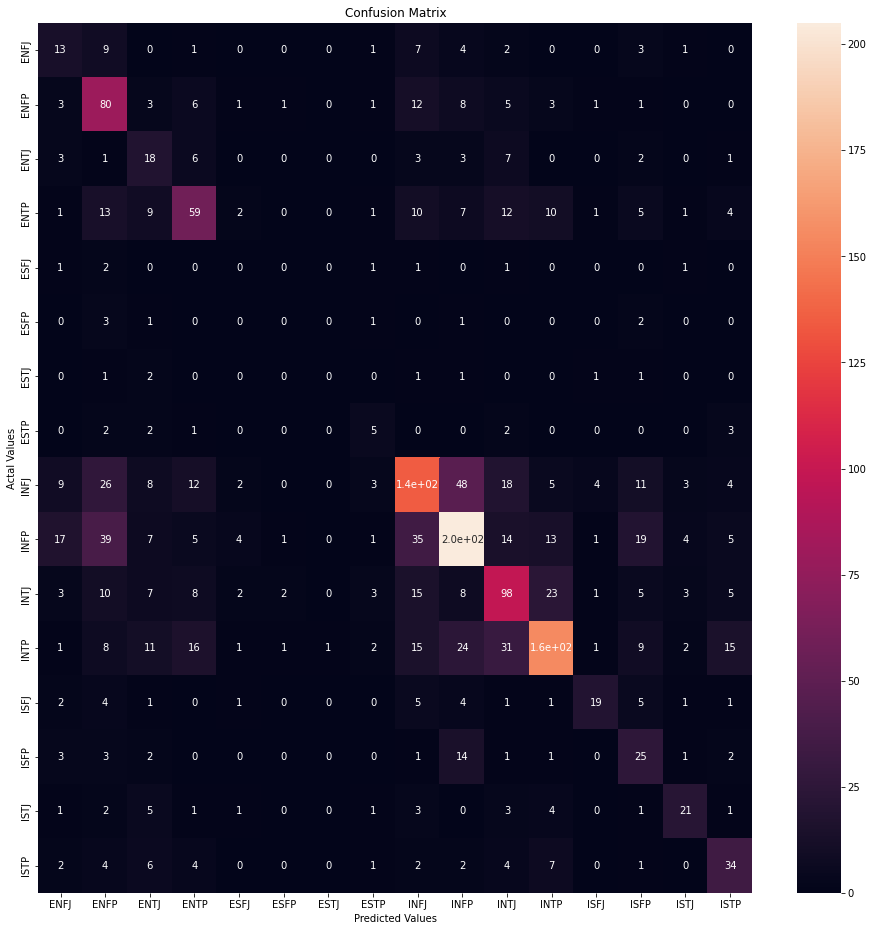

'Accuracy: 49.97%\nf1: 50.86%'

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train_ros, Y_train_ros)

Y_pred = NB.predict(X_test)
predictions = [round(value) for value in Y_pred]



# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)

cm_df = pd.DataFrame(cm,
                     index = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], 
                     columns = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'])

plt.figure(figsize=(16,16))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

'''Accuracy: 49.97%
f1: 50.86%'''

Accuracy: 48.36%
Accuracy: 49.11%
[[ 16   6   0   1   0   0   0   0   7   8   1   0   0   1   1   0]
 [  6  76   4   7   0   0   0   1   7  13   6   3   0   1   0   1]
 [  2   3  17   6   0   0   0   0   1   2  10   1   0   1   0   1]
 [  0  17  10  51   2   0   0   3  10   6  15  15   0   2   0   4]
 [  1   3   0   1   0   0   0   0   1   0   1   0   0   0   0   0]
 [  0   3   0   1   0   0   0   1   0   1   0   0   0   2   0   0]
 [  0   1   2   0   0   0   1   0   1   1   0   0   1   0   0   0]
 [  0   2   2   1   0   0   0   6   1   0   0   0   0   0   0   3]
 [ 15  26   8  10   0   0   0   4 131  50  16   8   2  13   2   3]
 [ 24  53   5   6   4   0   0   2  32 181  17  15   2  17   5   7]
 [  2   7   5   7   3   0   0   2  14   9 107  26   2   2   2   5]
 [  1  10   8  17   1   1   0   2   7  29  30 165   2   9   0  11]
 [  1   5   1   0   2   0   0   1   3   4   2   1  17   4   2   2]
 [  1   5   2   0   0   0   0   0   2  16   1   0   0  24   1   1]
 [  1   3   4   1   1   0   

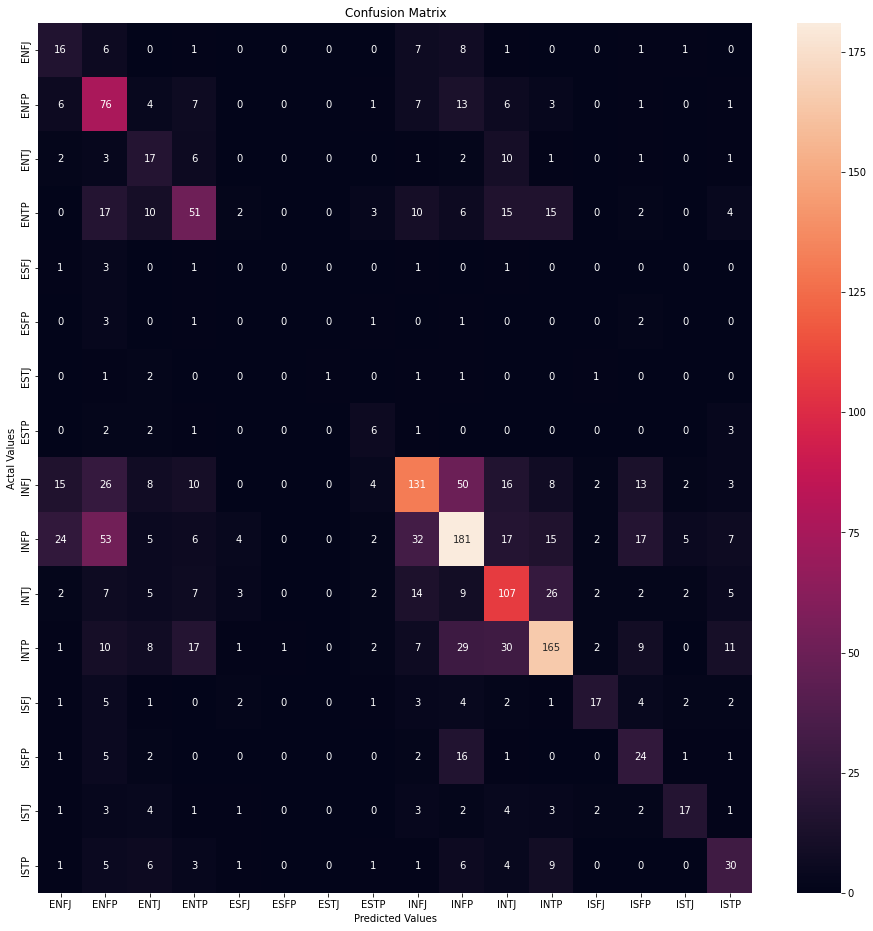

'Accuracy: 48.36%\nf1: 49.11%'

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train_smote, Y_train_smote)

Y_pred = NB.predict(X_test)
predictions = [round(value) for value in Y_pred]



# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)

cm_df = pd.DataFrame(cm,
                     index = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], 
                     columns = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'])

plt.figure(figsize=(16,16))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

'''Accuracy: 48.36%
f1: 49.11%'''

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
np.random.seed(1)
model = MultinomialNB()

'''results = cross_validate(estimator=model,
                                          X=dataset['posts'],
                                          y=dataset['type'],
                                          cv=kfolds,
                                          scoring=scoring)'''

tfidf2 = CountVectorizer(ngram_range=(1, 1), 
                         stop_words='english',
                         lowercase = True, 
                         max_features = 2500)


model_nb = Pipeline([('tfidf1', tfidf2), ('nb', MultinomialNB())])

results_nb = cross_validate(model_nb, dataset['posts'], dataset['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)
''' Accuracy:0.5669'''

y_pred = cross_val_predict(model, Y, X, cv=10)
cm=confusion_matrix(Y, y_pred)
print(cm)


ValueError: ignored

In [ ]:
np.mean(results[accuracy])

KeyError: ignored

In [ ]:
print("CV Accuracy: {:0.4f} ".format(np.mean(results_nb[accuracy])))
print("CV f1_score: {:0.4f} ".format(np.mean(results_nb['test_f1_score'])))


KeyError: ignored

Accuracy: 70.37%
Accuracy: 70.18%
[[ 18   4   0   0   0   0   0   0   7   5   2   2   0   1   2   0]
 [  1  81   2   5   0   0   0   1   6  14   9   4   0   0   1   1]
 [  2   1  28   5   0   0   0   0   1   1   6   0   0   0   0   0]
 [  0   6   5  90   1   0   1   0   7   4  10   9   0   2   0   0]
 [  0   0   0   2   2   0   0   0   0   1   0   1   0   0   1   0]
 [  0   2   2   1   0   0   0   0   0   0   0   1   0   2   0   0]
 [  0   0   1   1   0   0   3   0   1   1   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   7   0   0   0   4   0   0   0   3]
 [  1   6   5  10   0   0   0   0 193  33  15  15   0   6   2   2]
 [  4  13   1   7   3   0   0   0  15 291  10  15   1   4   1   5]
 [  0   3   4   3   2   2   1   0  12   7 138  16   0   1   3   1]
 [  0   1   1   8   1   0   0   1  10  13  10 237   0   2   1   8]
 [  1   0   1   1   1   0   0   0   4   3   1   2  29   1   0   1]
 [  0   1   1   1   0   0   1   0   3   8   1   4   0  31   1   1]
 [  1   1   0   1   0   0   

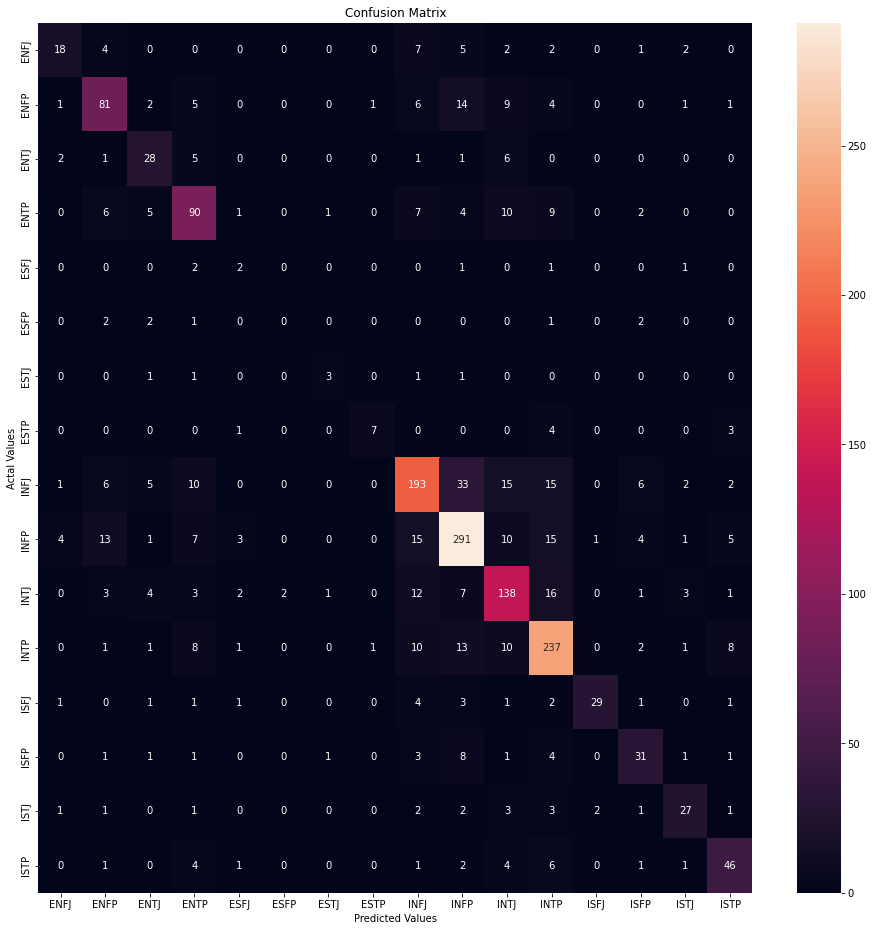

'Accuracy: 70.37%\nf1: 70.18%'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
accuracies = {}
logreg = LogisticRegression(C=0.5, class_weight='balanced',
                            fit_intercept=True,intercept_scaling=1,
                            multi_class='ovr', n_jobs=-1)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
predictions = [round(value) for value in Y_pred]



# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)

cm_df = pd.DataFrame(cm,
                     index = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], 
                     columns = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'])

plt.figure(figsize=(16,16))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
'''Accuracy: 70.37%
f1: 70.18%'''

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
accuracies = {}
logreg = LogisticRegression(C=0.5, class_weight='balanced',
                            fit_intercept=True,intercept_scaling=1,
                            multi_class='ovr', n_jobs=-1)
logreg.fit(X_train_smote, Y_train_smote)

Y_pred = logreg.predict(X_test)
predictions = [round(value) for value in Y_pred]



# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)

'''Accuracy: 69.28%
f1: 69.09%'''

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Accuracy: 69.28%
Accuracy: 69.09%
[[ 18   4   0   0   0   0   0   0   7   6   2   2   0   1   1   0]
 [  1  81   1   6   0   0   0   1   6  15   7   4   0   1   1   1]
 [  2   1  27   5   0   0   0   0   1   2   6   0   0   0   0   0]
 [  0   8   3  88   0   0   1   0   8   5  10  11   0   1   0   0]
 [  0   0   0   2   2   0   0   0   0   1   0   1   0   0   1   0]
 [  0   2   2   1   0   0   0   0   0   1   0   1   0   1   0   0]
 [  0   0   1   1   0   0   4   0   1   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   7   0   0   0   3   0   0   0   2]
 [  2   6   4   9   0   0   0   0 191  34  18  16   0   5   1   2]
 [  4  12   2   5   3   0   1   1  21 282  13  14   1   6   1   4]
 [  0   3   4   3   2   0   1   0  12   7 137  19   0   1   3   1]
 [  0   2   2   9   1   0   0   1  13  17   8 230   0   2   0   8]
 [  1   0   1   1   1   0   0   0   4   4   1   2  29   0   0   1]
 [  0   0   1   1   0   0   1   0   5   7   1   3   0  32   1   1]
 [  1   1   0   1   0   0   

'Accuracy: 69.11%'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
accuracies = {}
logreg = LogisticRegression(C=0.5, class_weight='balanced',
                            fit_intercept=True,intercept_scaling=1,
                            multi_class='ovr', n_jobs=-1)
logreg.fit(X_train_ros, Y_train_ros)

Y_pred = logreg.predict(X_test)
predictions = [round(value) for value in Y_pred]



# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)

'''Accuracy: 68.70%
f1: 68.67%%'''

Accuracy: 68.70%
Accuracy: 68.67%
[[ 19   4   0   0   0   0   0   0   8   5   2   1   0   1   1   0]
 [  1  79   2   6   0   0   0   1   7  14   8   3   0   1   2   1]
 [  2   1  28   6   0   0   0   0   1   1   4   1   0   0   0   0]
 [  0   6   5  90   1   0   1   0   8   4  10   8   0   2   0   0]
 [  0   0   0   2   2   0   0   0   0   1   0   1   0   0   1   0]
 [  0   2   2   1   0   0   0   0   0   1   0   1   0   1   0   0]
 [  0   0   1   1   0   0   4   0   1   0   0   0   0   0   0   0]
 [  0   0   1   1   1   0   0   7   0   0   0   2   0   1   0   2]
 [  2   7   4  10   0   0   0   0 188  35  17  14   0   7   1   3]
 [  6  14   1   8   3   1   0   0  18 278  13  15   1   6   1   5]
 [  0   3   4   3   2   2   1   0  12   8 135  17   0   1   4   1]
 [  0   2   2  11   1   1   0   1  11  14  14 224   0   2   0  10]
 [  1   0   1   1   0   0   0   0   4   3   1   2  30   1   0   1]
 [  0   0   1   1   0   0   1   0   4   8   0   4   0  32   1   1]
 [  1   1   0   1   0   0   

'Accuracy: 68.47%'

In [ ]:
from sklearn.model_selection import StratifiedKFold
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
scoring = {'acc': 'accuracy',
           'neg_log_loss': 'neg_log_loss',
           'f1_micro': 'f1_micro'}
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
np.random.seed(1)


tfidf2 = CountVectorizer(ngram_range=(1, 1), 
                         stop_words='english',
                         lowercase = True, 
                         max_features = 2500)

model_lr = Pipeline([('tfidf1', tfidf2), ('lr', LogisticRegression(C=0.5, class_weight='balanced',
                            fit_intercept=True,intercept_scaling=1,
                            multi_class='ovr', n_jobs=-1))])

results_lr = cross_validate(model_lr, dataset['posts'], dataset['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)

print("CV Accuracy: {:0.4f} ".format(np.mean(results_lr['test_acc'])))

'''CV Accuracy: 0.5600 '''

CV Accuracy: 0.5600 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_forest=RandomForestClassifier(max_depth=None, n_jobs = -1, bootstrap=True, random_state= 42) 
                                      
model_forest.fit(X_train,Y_train)
Y_pred = model_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)

'''Accuracy: 48.88%
f1: 43.44%'''

Accuracy: 48.88%
Accuracy: 43.44%
[[  0   2   0   0   0   0   0   0  12  20   1   6   0   0   0   0]
 [  0  26   0   3   0   0   0   0  17  65   7   7   0   0   0   0]
 [  0   0   1   1   0   0   0   0   8  17   9   8   0   0   0   0]
 [  0   2   0  37   0   0   0   0  21  39   8  28   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   5   1   0   0   0   0   0]
 [  0   1   0   2   0   0   0   0   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   4   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3   6   1   4   0   0   0   1]
 [  0   1   0   2   0   0   0   0 174  86  11  14   0   0   0   0]
 [  0   1   0   3   0   0   0   0  28 322   7   8   0   0   0   1]
 [  0   1   0   1   0   0   0   0  26  46  93  25   0   0   1   0]
 [  0   0   0   4   0   0   0   0  21  74  12 182   0   0   0   0]
 [  0   0   0   0   0   0   0   0  15  26   2   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0   6  40   3   4   0   0   0   0]
 [  0   0   0   1   0   0   

'Accuracy: 48.88%\nf1: 43.44%'

Accuracy: 60.23%
Accuracy: 59.02%
[[ 12   2   0   0   0   0   0   0   6  16   2   3   0   0   0   0]
 [  0  60   1   6   0   0   0   1  14  28   8   5   0   0   1   1]
 [  1   2  16   4   0   0   0   0   2   7   9   3   0   0   0   0]
 [  0   7   0  74   0   0   0   0   9  17   8  18   1   1   0   0]
 [  0   0   0   2   0   0   0   0   1   2   0   2   0   0   0   0]
 [  0   2   1   1   0   0   0   0   1   1   0   1   0   1   0   0]
 [  0   0   1   1   0   0   0   0   1   3   1   0   0   0   0   0]
 [  0   1   0   1   0   0   0   2   1   4   0   5   0   0   0   1]
 [  0   3   2   7   0   0   0   0 180  67  13  13   0   0   1   2]
 [  3   5   0   6   0   0   0   0  35 294   7  15   0   1   1   3]
 [  0   3   2   1   0   0   0   0  25  25 113  20   0   1   2   1]
 [  0   2   2   9   0   0   0   0  13  41  19 205   0   0   0   2]
 [  0   1   1   1   0   0   0   0   4  17   1   4  15   0   0   1]
 [  0   1   1   1   0   0   0   0   5  20   5   4   0  16   0   0]
 [  1   1   0   1   0   0   

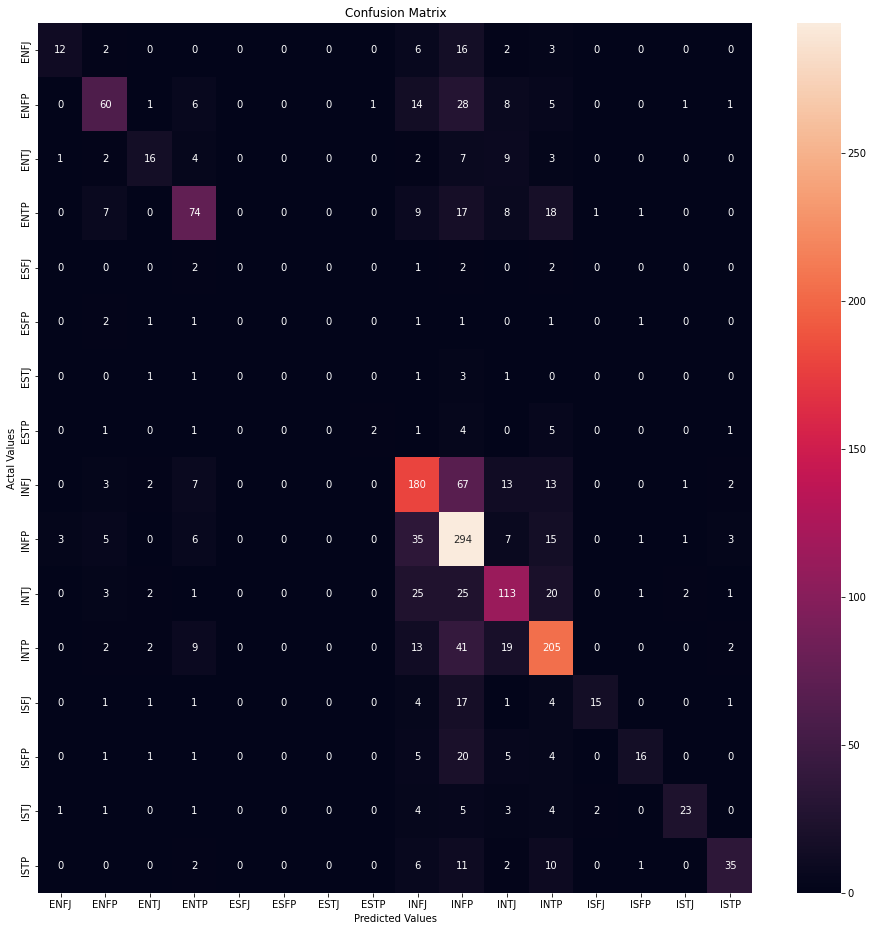

'Accuracy: 60.23%\nf1: 59.02%'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_forest=RandomForestClassifier(random_state=42, n_jobs=-1, bootstrap=True) 
                                      
model_forest.fit(X_train_ros,Y_train_ros)
Y_pred = model_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)

cm_df = pd.DataFrame(cm,
                     index = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], 
                     columns = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'])

plt.figure(figsize=(16,16))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

'''Accuracy: 60.23%
f1: 59.02%'''

In [ ]:
from sklearn.model_selection import StratifiedKFold
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
scoring = {'acc': 'accuracy',
           'neg_log_loss': 'neg_log_loss',
           'f1_micro': 'f1_micro'}
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
np.random.seed(1)

tfidf2 = CountVectorizer(ngram_range=(1, 1), 
                         stop_words='english',
                         lowercase = True, 
                         max_features = 2500)

model_rf = Pipeline([('tfidf1', tfidf2), ('rf', RandomForestClassifier(random_state=42, n_jobs=-1, bootstrap=True))])

results_rf = cross_validate(model_rf, dataset['posts'], dataset['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)

print("CV Accuracy: {:0.4f} ".format(np.mean(results_rf['test_acc'])))
print("CV f1: {:0.4f} ".format(np.mean(results_rf['test_f1_micro'])))

'''CV Accuracy: 0.5357 '''

CV Accuracy: 0.5353 
CV f1: 0.5353 


'CV Accuracy: 0.5357 '

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_forest=RandomForestClassifier(random_state=42, n_jobs=-1, bootstrap=True) 
                                      
model_forest.fit(X_train_smote,Y_train_smote)
Y_pred = model_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)

'''Accuracy: 59.02%'''

Accuracy: 56.66%
Accuracy: 55.04%
[[  7   3   0   0   0   0   0   0  10  14   4   2   0   0   1   0]
 [  0  60   0   6   0   0   0   0  21  21   9   4   0   1   1   2]
 [  1   2  16   2   0   0   0   0   3   6  10   4   0   0   0   0]
 [  0   4   0  67   0   0   0   0  16  18  12  18   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   2   0   2   0   0   1   0]
 [  0   2   1   1   0   0   0   0   1   2   0   1   0   0   0   0]
 [  0   0   1   0   0   0   0   0   2   3   1   0   0   0   0   0]
 [  0   0   0   2   0   0   0   3   1   2   0   6   0   0   0   1]
 [  0   3   0  12   0   0   0   0 170  72  13  16   0   0   1   1]
 [  1   5   0   3   0   0   0   0  33 295   9  19   0   2   1   2]
 [  0   3   1   3   0   0   0   0  29  31 103  22   0   0   1   0]
 [  0   3   1  13   0   0   0   0  19  38  27 190   0   0   0   2]
 [  0   0   1   2   0   0   0   0   6  15   0   5  15   0   0   1]
 [  0   0   0   1   0   0   0   0   4  31   2   0   0  12   2   1]
 [  1   1   1   0   0   0   

'Accuracy: 59.02%'

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train,Y_train)

Y_pred = XGB.predict(X_test)
predictions = [round(value) for value in Y_pred]



# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)

'''Accuracy: 69.16%
f1: 68.41%'''

Accuracy: 69.16%
Accuracy: 68.41%
[[ 11   5   0   0   0   0   0   0   8  11   3   2   0   0   0   1]
 [  1  78   0   6   0   0   0   1   7  15   7   6   0   0   2   2]
 [  1   3  23   4   0   0   0   0   1   3   5   4   0   0   0   0]
 [  0   7   0  91   0   0   0   0  10   6   9   9   1   1   0   1]
 [  0   0   0   2   1   0   0   0   0   1   0   2   0   0   1   0]
 [  0   2   1   1   0   0   0   0   1   1   0   0   0   1   0   1]
 [  0   0   1   1   0   0   2   0   1   1   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   8   0   0   0   5   0   0   0   2]
 [  0   6   3  15   0   0   0   0 193  35  15  14   1   2   1   3]
 [  1   5   0   9   0   0   0   0  26 306   5  11   0   4   1   2]
 [  0   2   2   1   0   0   0   0  17  16 141  10   0   1   2   1]
 [  0   1   1  13   0   0   0   0  10  26  11 227   1   0   0   3]
 [  0   1   1   1   0   0   0   0   3   4   1   4  29   0   0   1]
 [  0   2   0   0   1   0   0   0   2   8   6   5   0  27   1   1]
 [  1   2   0   0   0   0   

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train_smote,Y_train_smote)

Y_pred = XGB.predict(X_test)
predictions = [round(value) for value in Y_pred]



# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)



'''Accuracy: 69.28%'''

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train_ros,Y_train_ros)

Y_pred = XGB.predict(X_test)
predictions = [round(value) for value in Y_pred]



# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f1=f1_score(Y_test, predictions, average='weighted')
cm=confusion_matrix(Y_test, predictions)
accuracies['Logistic Regression'] = accuracy* 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.2f%%" % (f1 * 100.0))
print(cm)

''' Accuracy: 66.46%'''

Accuracy: 65.94%
Accuracy: 66.14%
[[ 19   5   0   1   0   0   0   0   4   5   3   2   0   1   0   1]
 [  2  83   0   8   0   0   0   1   6   9   7   4   0   1   3   1]
 [  3   2  26   4   1   0   0   1   1   1   4   1   0   0   0   0]
 [  0   6   7  90   1   0   0   1   6   4   8   7   1   1   2   1]
 [  0   0   0   2   1   0   0   0   0   1   0   1   1   0   1   0]
 [  0   2   1   1   0   2   0   0   1   0   0   0   0   1   0   0]
 [  0   0   1   1   0   0   3   0   0   0   1   0   1   0   0   0]
 [  0   0   0   0   0   0   0  10   0   0   0   1   1   1   0   2]
 [  2   7   8  13   0   0   0   3 171  25  16  19   4   9   5   6]
 [  8  20   2  11   0   1   1   2  23 259   9  11   3  13   2   5]
 [  2   6   4   6   1   0   1   1  13   9 128  11   0   4   5   2]
 [  0   3   7  19   0   0   0   1   7  22  11 209   3   3   1   7]
 [  0   0   1   1   1   0   0   0   0   4   0   2  33   1   0   2]
 [  0   1   1   0   0   0   0   1   1   3   2   3   0  38   3   0]
 [  2   2   1   0   0   0   

' Accuracy: 66.46%'

In [ ]:
'''from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=5)
model=XGB = XGBClassifier(gpu_id=0,max_depth=5,n_estimators=50,learning_rate=0.1)
scores=cross_val_score(model,Y,X,cv=skfold)
print(np.mean(scores))

accuracy = 0.6821902017291066'''

'from sklearn.model_selection import StratifiedKFold\nfrom sklearn.model_selection import cross_val_score\nskfold=StratifiedKFold(n_splits=5)\nmodel=XGB = XGBClassifier(gpu_id=0,max_depth=5,n_estimators=50,learning_rate=0.1)\nscores=cross_val_score(model,Y,X,cv=skfold)\nprint(np.mean(scores))\n\naccuracy = 0.6821902017291066'

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
from sklearn.model_selection import StratifiedKFold
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
scoring = {'acc': 'accuracy',
           'neg_log_loss': 'neg_log_loss',
           'f1_micro': 'f1_micro'}
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
np.random.seed(1)


tfidf2 = CountVectorizer(ngram_range=(1, 1), 
                         stop_words='english',
                         lowercase = True, 
                         max_features = 2500)

model_XGB = Pipeline([('tfidf1', cv), ('XGB', XGBClassifier(gpu_id=0,max_depth=5,n_estimators=50,learning_rate=0.1))])

results_XGB = cross_validate(model_XGB, dataset['posts'], dataset['type'], cv=kfolds, 
                          scoring=scoring, n_jobs=-1)

print("CV Accuracy: {:0.4f} ".format(np.mean(results_XGB['test_acc'])))

'''CV Accuracy: 0.6704 '''

CV Accuracy: 0.6704 
